In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test  = tf.keras.utils.normalize(x_test,axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')

model.fit(x_train, y_train , epochs=3)
model.save('handwritten.model') 



Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2649 - accuracy: 0.9217
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1071 - accuracy: 0.9672
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0722 - accuracy: 0.9769
INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


1/1 [==============================] - 0s 112ms/step
this digit is probably a 3


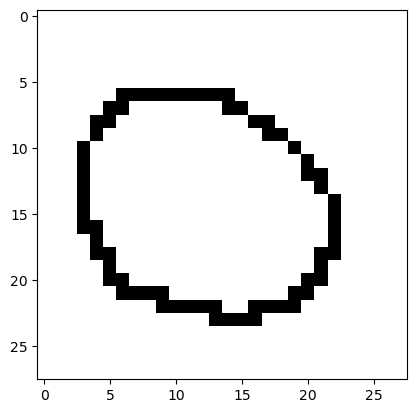

1/1 [==============================] - 0s 28ms/step
this digit is probably a 2


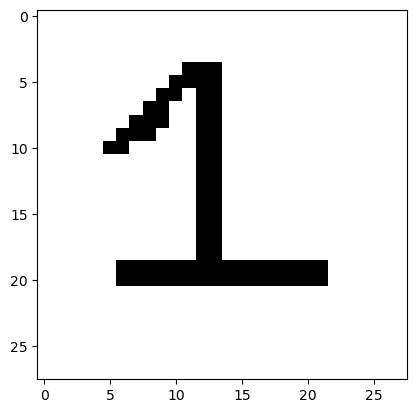

1/1 [==============================] - 0s 36ms/step
this digit is probably a 3


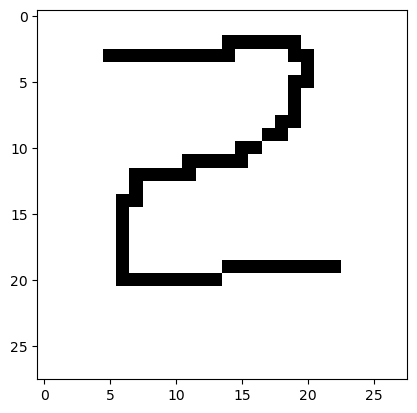

1/1 [==============================] - 0s 34ms/step
this digit is probably a 3


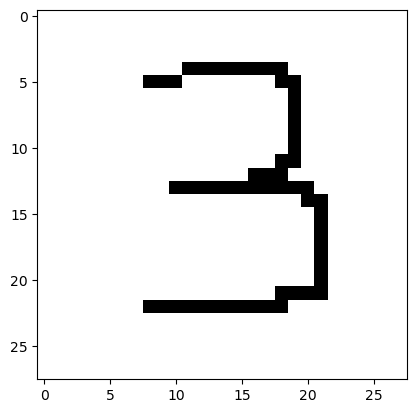

1/1 [==============================] - 0s 51ms/step
this digit is probably a 8


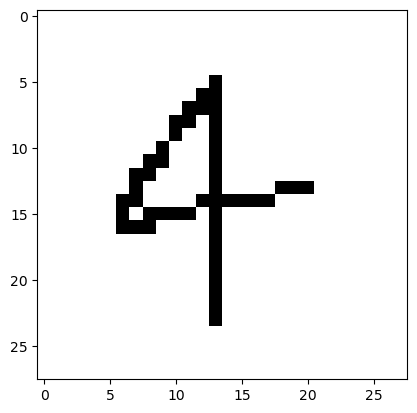

1/1 [==============================] - 0s 33ms/step
this digit is probably a 5


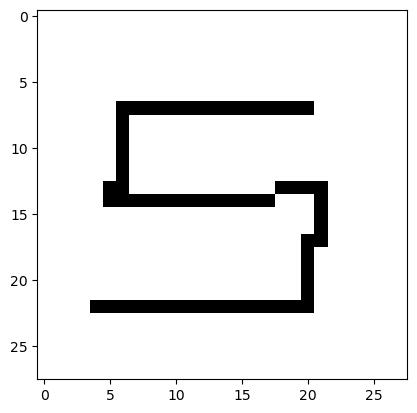

1/1 [==============================] - 0s 48ms/step
this digit is probably a 5


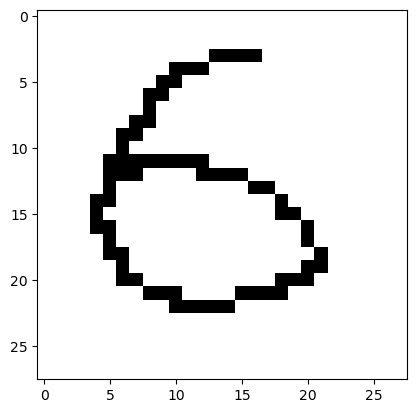

1/1 [==============================] - 0s 48ms/step
this digit is probably a 2


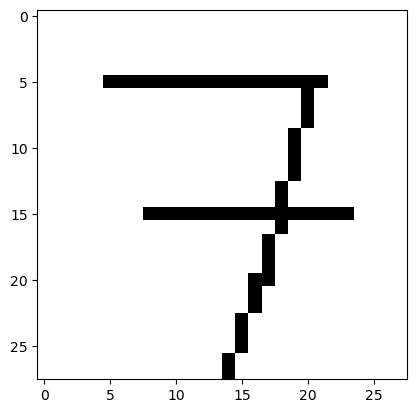

1/1 [==============================] - 0s 48ms/step
this digit is probably a 8


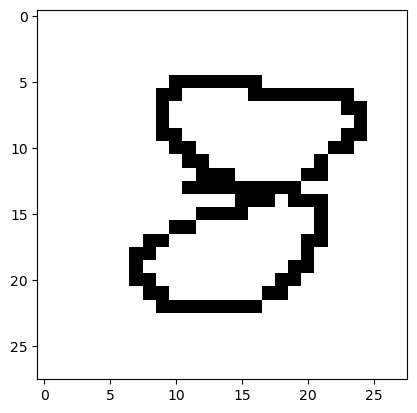

1/1 [==============================] - 0s 53ms/step
this digit is probably a 9


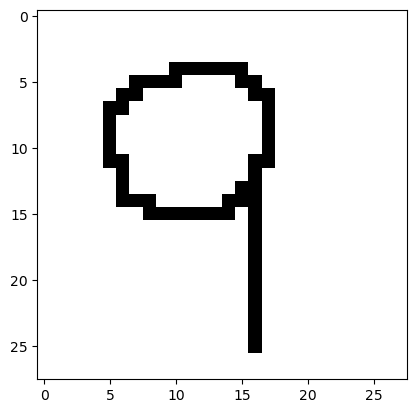

In [4]:
model=tf.keras.models.load_model('handwritten.model')

image_number = 0
while os.path.isfile(f"dataset\image{image_number}.png"):
    try:
        img = cv2.imread(f"dataset\image{image_number}.png")[:,:,0]
        img=np.invert(np.array([img]))
        prediction =model.predict(img)
        print(f"this digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print("error!")
    finally:
        image_number += 1
